In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
url = 'online_retail.xlsx'
# url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx'
data_2009_2010 = pd.read_excel(url, sheet_name='Year 2009-2010')
data_2010_2011 = pd.read_excel(url, sheet_name='Year 2010-2011')
data = pd.concat([data_2009_2010, data_2010_2011])

### Pais que más productos consume

In [6]:
country_product = data.groupby('Country')['Quantity'].sum().sort_values(ascending=False)
print(country_product)

Country
United Kingdom          8692875
Netherlands              381951
EIRE                     331341
Denmark                  235218
Germany                  224581
France                   184952
Australia                103706
Sweden                    87875
Switzerland               52378
Spain                     45156
Belgium                   35132
Japan                     31822
Portugal                  28058
Norway                    27110
Channel Islands           20473
Italy                     15309
Finland                   14317
Austria                   11306
Cyprus                    10688
Greece                     7707
Hong Kong                  7075
Singapore                  6987
United Arab Emirates       6728
Unspecified                6716
Poland                     5644
Israel                     5485
USA                        3700
Canada                     3657
Iceland                    3286
Lithuania                  2958
Bermuda                    2798


### Los productos más vendidos o los más populares en términos de ganancias o cantidad de ventas

In [7]:
#Por cantidad de ventas
popular_products_quantity = data.groupby('Description')['Quantity'].sum().sort_values(ascending=False)
print(popular_products_quantity)

# Por ganancias
data['Revenue'] = data['Quantity'] * data['Price']
popular_products_revenue = data.groupby('Description')['Revenue'].sum().sort_values(ascending=False)
print(popular_products_revenue)


Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     108545
WHITE HANGING HEART T-LIGHT HOLDER     93050
ASSORTED COLOUR BIRD ORNAMENT          81306
JUMBO BAG RED RETROSPOT                78090
BROCADE RING PURSE                     70700
                                       ...  
Unsaleable, destroyed.                -15644
missing                               -16467
printing smudges/thrown away          -19200
given away                            -20000
?                                     -26757
Name: Quantity, Length: 5698, dtype: int64
Description
REGENCY CAKESTAND 3 TIER              327813.650
DOTCOM POSTAGE                        322647.470
WHITE HANGING HEART T-LIGHT HOLDER    257533.900
JUMBO BAG RED RETROSPOT               148800.640
PARTY BUNTING                         147948.500
                                         ...    
Discount                              -13484.540
Bank Charges                          -33493.669
Manual                                -82781.2


Las ventas en línea a veces pueden tener devoluciones de productos o cancelaciones de pedidos que son registradas como cantidades negativas en los conjuntos de datos. En el caso de este conjunto de datos, parece que los valores negativos están representando estos casos.

In [8]:
# Filtrar el dataframe para excluir valores negativos
data_sales = data[data['Quantity'] > 0]
data_revenue = data[data['Revenue'] > 0]

popular_products_quantity = data_sales.groupby('Description')['Quantity'].sum().sort_values(ascending=False)
print(popular_products_quantity)

popular_products_revenue = data_revenue.groupby('Description')['Revenue'].sum().sort_values(ascending=False)
print(popular_products_revenue)


Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     110249
WHITE HANGING HEART T-LIGHT HOLDER     96688
ASSORTED COLOUR BIRD ORNAMENT          81817
PAPER CRAFT , LITTLE BIRDIE            80995
JUMBO BAG RED RETROSPOT                79285
                                       ...  
F FAIRY POTPOURRI CUSHIONS SUMMER          1
SET 10 CARDS SNOWY ROBIN 17099             1
F.FAIRY S/3 SML CANDLE, LAVENDER           1
SET 10 CARDS TRIANGLE ICONS  17220         1
HANDZ-OFF CAR FRESHENER                    1
Name: Quantity, Length: 5469, dtype: int64
Description
REGENCY CAKESTAND 3 TIER              344563.250
Manual                                341104.900
DOTCOM POSTAGE                        322657.480
WHITE HANGING HEART T-LIGHT HOLDER    266923.550
PAPER CRAFT , LITTLE BIRDIE           168469.600
                                         ...    
CAT W SUNGLASSES BLANK CARD                0.760
SET 12 COLOURING PENCILS DOILEY            0.650
PINK HEART CHRISTMAS DECORATION            0.3

### Tendencias

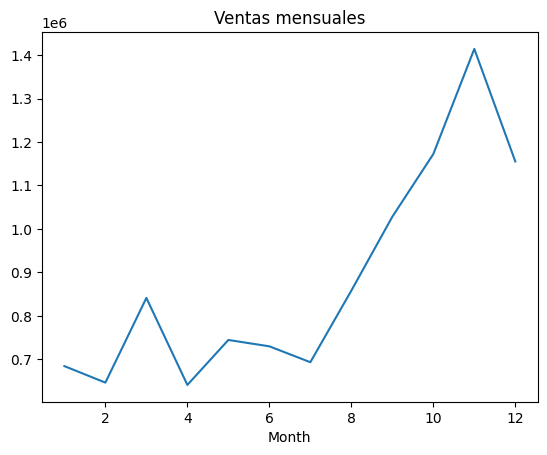

In [13]:
# Convertir la columna InvoiceDate a formato datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Agregar una columna de 'Month'
data['Month'] = data['InvoiceDate'].dt.month

# Calcular ventas por mes
monthly_sales = data.groupby('Month')['Quantity'].sum()

# Graficar ventas mensuales
monthly_sales.plot(kind='line', title='Ventas mensuales')
plt.show()


Las ventas aumentan entre los meses de Julio a Noviembre, esto se puede deber a estos posibles factores:
Compras de vacaciones: Los picos de ventas de agosto a noviembre podrían estar relacionados con las compras de la temporada de vacaciones. Muchas personas comienzan a comprar regalos para las vacaciones de fin de año durante estos meses, lo que podría explicar el aumento en las ventas. Este patrón se observa a menudo en los datos de ventas al por menor.

Ventas del "Black Friday" y "Cyber Monday": En muchos países, noviembre es el mes en que se celebran las ventas del "Black Friday" y el "Cyber Monday". Estos días de ventas masivas podrían ser responsables de un pico significativo en las ventas durante este mes.

Promociones y descuentos de temporada: Muchas empresas también ofrecen promociones y descuentos especiales durante la temporada de fin de año para atraer a los clientes. Estas promociones podrían estar impulsando las ventas durante estos meses.

Comportamiento del consumidor: Las personas tienden a gastar más al final del año debido a las festividades, las vacaciones y, a veces, por la necesidad de gastar presupuestos (personales y profesionales) antes de que termine el año.

### Análisis de correlación

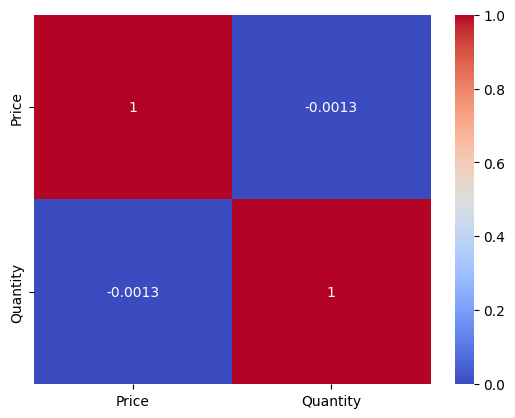

In [14]:
correlation = data[['Price', 'xsQuantity']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()


En tu caso, el coeficiente de correlación entre 'Price' y 'Quantity' es -0.0013. Esto es muy cercano a 0, lo que indica que no hay una correlación significativa entre el precio de un producto y la cantidad vendida de ese producto

En otras palabras, cambiar el precio del producto (al menos dentro del rango de precios existente en tus datos) no parece tener un efecto significativo en cuántas unidades se venden, y viceversa.